In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [8]:
# NBA Data Files
games = "Resources/games.csv"
games_details = "Resources/games_details.csv"
players = "Resources/players.csv"
ranking = "Resources/ranking.csv"
teams = "Resources/teams.csv"

In [9]:
# Read the data from games dataset
games_df = pd.read_csv(games)
print(games_df.shape)
pd.set_option('display.max_columns',50)
games_df.tail()

(26651, 21)


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1
26650,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,0.333,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0


In [10]:
# Checking the date range of this data
# First finding the minimum year of this data
min_yr = games_df["SEASON"].min()

# Finding the maximum year of the data
max_yr = games_df["SEASON"].max()
print(f' This data is for NBA seasons from {min_yr} to {max_yr}')

 This data is for NBA seasons from 2003 to 2022


In [11]:
# How many games do I have data from?
games_df['GAME_ID'].nunique()

26622

In [12]:
# Looking at column names and data types to get a sense of the data that is present in this games dataset
games_df.dtypes

GAME_DATE_EST        object
GAME_ID               int64
GAME_STATUS_TEXT     object
HOME_TEAM_ID          int64
VISITOR_TEAM_ID       int64
SEASON                int64
TEAM_ID_home          int64
PTS_home            float64
FG_PCT_home         float64
FT_PCT_home         float64
FG3_PCT_home        float64
AST_home            float64
REB_home            float64
TEAM_ID_away          int64
PTS_away            float64
FG_PCT_away         float64
FT_PCT_away         float64
FG3_PCT_away        float64
AST_away            float64
REB_away            float64
HOME_TEAM_WINS        int64
dtype: object

In [13]:
# Looking at unique counts to better understand this data
unique_counts = games_df.nunique()
print(unique_counts)

GAME_DATE_EST        4304
GAME_ID             26622
GAME_STATUS_TEXT        1
HOME_TEAM_ID           30
VISITOR_TEAM_ID        30
SEASON                 20
TEAM_ID_home           30
PTS_home              100
FG_PCT_home           404
FT_PCT_home           410
FG3_PCT_home          437
AST_home               42
REB_home               55
TEAM_ID_away           30
PTS_away              106
FG_PCT_away           393
FT_PCT_away           387
FG3_PCT_away          417
AST_away               41
REB_away               52
HOME_TEAM_WINS          2
dtype: int64


In [14]:
# Read the data from games_details dataset
games_details_df = pd.read_csv(games_details)
print(games_details_df.shape)
games_details_df.head()

(668628, 29)


/var/folders/k1/p7f99z1557z1twq8wpyj8m0r0000gn/T/ipykernel_24787/3967383474.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_df = pd.read_csv(games_details)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.7,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.0,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [9]:
KDIDfind = games_details_df.loc[games_details_df['PLAYER_NAME'] == "Kevin Durant"]
KDIDfind

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
164,22200470,1610612751,BKN,Brooklyn,201142,Kevin Durant,Kevin,F,NaN,29:06,9.0,17.0,0.529,1.0,3.0,0.333,4.0,4.0,1.000,0.0,7.0,7.0,5.0,4.0,0.0,2.0,2.0,23.0,29.0
722,22200447,1610612751,BKN,Brooklyn,201142,Kevin Durant,Kevin,F,NaN,36:23,14.0,22.0,0.636,3.0,5.0,0.600,12.0,13.0,0.923,1.0,5.0,6.0,2.0,1.0,2.0,6.0,3.0,43.0,-3.0
1146,22200433,1610612751,BKN,Brooklyn,201142,Kevin Durant,Kevin,F,NaN,37.000000:07,10.0,15.0,0.667,2.0,3.0,0.667,6.0,6.0,1.000,0.0,4.0,4.0,3.0,1.0,0.0,5.0,3.0,28.0,9.0
1774,22200403,1610612751,BKN,Brooklyn,201142,Kevin Durant,Kevin,F,NaN,33:26,11.0,17.0,0.647,3.0,6.0,0.500,5.0,5.0,1.000,0.0,9.0,9.0,6.0,1.0,1.0,3.0,1.0,30.0,11.0
2384,22200380,1610612751,BKN,Brooklyn,201142,Kevin Durant,Kevin,F,NaN,36:12,14.0,25.0,0.560,2.0,7.0,0.286,4.0,4.0,1.000,0.0,4.0,4.0,4.0,1.0,2.0,4.0,0.0,34.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666723,11200087,1610612760,OKC,Oklahoma City,201142,Kevin Durant,NaN,NaN,NaN,30,6.0,13.0,0.462,1.0,4.0,0.250,3.0,3.0,1.000,0.0,6.0,6.0,5.0,1.0,1.0,0.0,2.0,16.0,NaN
667015,11200074,1610612760,OKC,Oklahoma City,201142,Kevin Durant,NaN,NaN,NaN,28,8.0,17.0,0.471,2.0,4.0,0.500,4.0,4.0,1.000,1.0,3.0,4.0,0.0,3.0,0.0,2.0,1.0,22.0,NaN
667524,11200055,1610612760,OKC,Oklahoma City,201142,Kevin Durant,NaN,NaN,NaN,26,5.0,12.0,0.417,1.0,3.0,0.333,2.0,3.0,0.667,0.0,2.0,2.0,7.0,0.0,1.0,2.0,1.0,13.0,NaN
668090,11200034,1610612760,OKC,Oklahoma City,201142,Kevin Durant,NaN,NaN,NaN,19,3.0,7.0,0.429,1.0,3.0,0.333,2.0,2.0,1.000,1.0,1.0,2.0,3.0,0.0,1.0,2.0,2.0,9.0,NaN


In [15]:
# Finding the columns with mixed datatypes
for col in games_details_df:
    unique_types = games_details_df[col].apply(type).unique()
    if len(unique_types) > 1:
        print(col, unique_types)

NICKNAME [<class 'str'> <class 'float'>]
START_POSITION [<class 'str'> <class 'float'>]
COMMENT [<class 'float'> <class 'str'>]
MIN [<class 'str'> <class 'float'>]


In [16]:
# Looking at column names and data types to get a sense of the data that is present in this games_details dataset
games_details_df.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [17]:
# Read the data from players dataset
players_df = pd.read_csv(players)
print(players_df.shape)
players_df.head()

(7228, 4)


,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [18]:
# Checking that the player IDs are consistent across dataframes

royce = 1626220
royce_check = games_details_df.loc[games_details_df['PLAYER_ID']== royce]
royce_check

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
165,22200470,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,26:50,5.0,7.0,0.714,4.0,6.0,0.667,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,3.0,2.0,14.0,28.0
723,22200447,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,31:37,4.0,6.0,0.667,3.0,4.0,0.750,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,11.0,-2.0
1147,22200433,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,32.000000:29,0.0,4.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,7.0,7.0,3.0,0.0,0.0,3.0,5.0,0.0,-4.0
2385,22200380,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,37:19,2.0,5.0,0.400,2.0,4.0,0.500,0.0,2.0,0.0,3.0,6.0,9.0,5.0,0.0,1.0,3.0,1.0,6.0,7.0
2658,22200364,1610612751,BKN,Brooklyn,1626220,Royce O'Neale,Royce,F,NaN,37:22,1.0,6.0,0.167,1.0,4.0,0.250,0.0,0.0,0.0,2.0,2.0,4.0,4.0,1.0,0.0,1.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481478,21700023,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481825,21700010,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482834,11700058,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,NaN,9:23,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0,6.0
482914,11700047,1610612762,UTA,Utah,1626220,Royce O'Neale,NaN,NaN,NaN,6:53,2.0,4.0,0.500,1.0,3.0,0.333,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,-2.0


In [19]:
# Read the data from ranking dataset
ranking_df = pd.read_csv(ranking)
print(ranking_df.shape)
ranking_df

(210342, 13)


,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [20]:
# Read the data from teams dataset
teams_df = pd.read_csv(teams)
print(teams_df.shape)
teams_df.head()

(30, 14)


,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [21]:
# Create a new dataframe and merge both game datasets
game_data_merge_df = pd.merge(games_details_df, games_df, on='GAME_ID')
print(game_data_merge_df.shape)
pd.set_option('display.max_columns',50)
display(game_data_merge_df)

(669560, 49)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE_EST,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.700,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2022-12-22,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669555,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669556,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669557,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
669558,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN,2012-10-06,Final,1610612746,1610612743,2012,1610612746,104.0,0.512,0.700,0.267,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0


In [22]:
# Columns list for new df

game_data_merge_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS', 'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [23]:
# Create a new dataframe and merge the team and rankings data sets
team_and_rankings_df = pd.merge(teams_df, ranking_df, on='TEAM_ID')
print(team_and_rankings_df.shape)
pd.set_option('display.max_columns',50)
display(team_and_rankings_df)

(210342, 26)


,LEAGUE_ID_x,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION,LEAGUE_ID_y,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-22,East,Atlanta,32,16,16,0.500,10-6,6-10,NaN
1,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-21,East,Atlanta,32,16,16,0.500,10-6,6-10,NaN
2,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-20,East,Atlanta,31,16,15,0.516,10-5,6-10,NaN
3,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-19,East,Atlanta,31,16,15,0.516,10-5,6-10,NaN
4,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,0,22022,2022-12-18,East,Atlanta,30,15,15,0.500,9-5,6-10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-05,West,Golden State,82,51,31,0.622,27-14,24-17,NaN
210338,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-04,West,Golden State,82,51,31,0.622,27-14,24-17,NaN
210339,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-03,West,Golden State,82,51,31,0.622,27-14,24-17,NaN
210340,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,0,22013,2014-09-02,West,Golden State,82,51,31,0.622,27-14,24-17,NaN


# Examining consistency in points per game:
# 'Most consistent' = 'has the smallest total standard deviation in the dataset for a given stat'

# Filter the dataset to players participating in at least 82 games (equivalent of 1 NBA season) across the 20 seasons of games

In [24]:
# Filtering the dataset to include only players relevant to the analysis

# First reducing to players who have played at least one full NBA season (82 games) within the 20 seasons in question
games_cutoff = 82

# Average points per game must be greater than 0 (may or may not use this)
PTS_avg = 0

In [25]:
# First, getting the value counts for games by player ID

games_threshold = games_details_df['PLAYER_ID'].value_counts()
games_threshold

2544       1795
2617       1720
2738       1560
2730       1541
2594       1534
           ... 
201251        1
1629260       1
201252        1
974           1
203198        1
Name: PLAYER_ID, Length: 2687, dtype: int64

In [26]:
# Checking that this worked using Kevin Durant as an example
# Kevin Durant PLAYER_ID is: 201142
KDcheck = games_threshold.loc[games_threshold.index == 201142]
KDcheck

201142    1220
Name: PLAYER_ID, dtype: int64

In [27]:
#Finding the 'PLAYER IDs' of players who have played at least 82 games
valid_player_ids = games_threshold[games_threshold >= games_cutoff].index.tolist()
valid_player_ids
# This reduces the dataset from 2687 players to 1447 and reduces the population of players by 47%

[2544,
 2617,
 2738,
 2730,
 2594,
 101108,
 2546,
 1713,
 2772,
 2225,
 101150,
 2037,
 1717,
 200794,
 2548,
 2200,
 2585,
 1891,
 2207,
 2199,
 2210,
 201152,
 2747,
 200746,
 2564,
 1938,
 1718,
 200765,
 200755,
 200768,
 2561,
 200752,
 101107,
 201566,
 2555,
 201145,
 201599,
 2592,
 201143,
 2216,
 201142,
 2403,
 201588,
 201935,
 1495,
 101109,
 2419,
 1889,
 201144,
 201577,
 2440,
 2734,
 201571,
 201586,
 201162,
 2736,
 201609,
 1737,
 201587,
 201942,
 201580,
 2034,
 2571,
 101181,
 2749,
 201959,
 101112,
 2757,
 200757,
 101139,
 2744,
 708,
 101161,
 2570,
 2754,
 201980,
 977,
 201158,
 201188,
 201939,
 201988,
 200826,
 2550,
 1890,
 2581,
 2746,
 202083,
 201949,
 2406,
 101141,
 201950,
 201572,
 201567,
 2547,
 2733,
 101114,
 201961,
 2743,
 101138,
 2590,
 201952,
 965,
 2588,
 2399,
 101135,
 101127,
 201584,
 2446,
 2400,
 951,
 201569,
 2203,
 101145,
 2557,
 1897,
 200782,
 202334,
 101162,
 2223,
 202324,
 2045,
 2549,
 201147,
 2222,
 2422,
 202709,
 2

In [28]:
# Create a new DataFrame with 'PLAYER_ID's that have 82 or more occurrences
valid_games_df = games_details_df[games_details_df['PLAYER_ID'].isin(valid_player_ids)]
valid_games_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
5,22200477,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,NaN,NaN,18:04,2.0,6.0,0.333,0.0,0.0,0.000,2.0,2.0,1.000,1.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,6.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [29]:
len(valid_games_df['PLAYER_ID'].unique())

1447

In [30]:
# Create a DataFrame that includes points per game average
points_df = valid_games_df.groupby('PLAYER_ID').agg({'PTS':'mean', 'PLAYER_NAME':'first'}).reset_index()
points_df = points_df.rename(columns={'PTS':'PTS_avg'})
points_df

,PLAYER_ID,PTS_avg,PLAYER_NAME
0,15,3.708543,Eric Piatkowski
1,56,9.346667,Gary Payton
2,57,8.402367,Doug Christie
3,72,5.182796,Kenny Anderson
4,84,15.294444,Latrell Sprewell
...,...,...,...
1442,1630613,8.661972,Duane Washington Jr.
1443,1630625,4.080000,Dalano Banton
1444,1630631,7.323232,Jose Alvarado
1445,1630678,6.703704,Terry Taylor


In [31]:
# Create a DataFrame that includes standard deviation of points per game
points_std_df = valid_games_df.groupby('PLAYER_ID').agg({'PTS':'std', 'PLAYER_NAME':'first'}).reset_index()
points_std_df = points_std_df.rename(columns={'PTS':'PTS_std'})
points_std_df

,PLAYER_ID,PTS_std,PLAYER_NAME
0,15,4.023351,Eric Piatkowski
1,56,6.016673,Gary Payton
2,57,5.660346,Doug Christie
3,72,3.983516,Kenny Anderson
4,84,8.281161,Latrell Sprewell
...,...,...,...
1442,1630613,7.014156,Duane Washington Jr.
1443,1630625,4.315066,Dalano Banton
1444,1630631,6.401257,Jose Alvarado
1445,1630678,6.488392,Terry Taylor


In [32]:
# Get to a DataFrame with both avg and standard deviation of points per game
combined_pts = pd.merge(points_df, points_std_df, on=['PLAYER_ID', 'PLAYER_NAME'])

# reorder columns
combined_pts = combined_pts[['PLAYER_ID', 'PLAYER_NAME', 'PTS_avg', 'PTS_std']]

# take a look at this new DataFrame
combined_pts

,PLAYER_ID,PLAYER_NAME,PTS_avg,PTS_std
0,15,Eric Piatkowski,3.708543,4.023351
1,56,Gary Payton,9.346667,6.016673
2,57,Doug Christie,8.402367,5.660346
3,72,Kenny Anderson,5.182796,3.983516
4,84,Latrell Sprewell,15.294444,8.281161
...,...,...,...,...
1442,1630613,Duane Washington Jr.,8.661972,7.014156
1443,1630625,Dalano Banton,4.080000,4.315066
1444,1630631,Jose Alvarado,7.323232,6.401257
1445,1630678,Terry Taylor,6.703704,6.488392


In [33]:
# Sort this list descending by points per game average to find 'top performers' in this stats category
combined_pts = combined_pts.sort_values(by='PTS_avg', ascending=False).reset_index()
combined_pts

,index,PLAYER_ID,PLAYER_NAME,PTS_avg,PTS_std
0,561,201142,Kevin Durant,27.074539,8.008606
1,1246,1629029,Luka Doncic,26.941003,8.499708
2,338,2544,LeBron James,26.834292,8.198610
3,100,977,Kobe Bryant,26.621463,10.208717
4,82,947,Allen Iverson,25.863341,9.735010
...,...,...,...,...,...
1442,107,1032,Darvin Ham,1.230263,2.024585
1443,814,202933,Julyan Stone,1.123596,2.060562
1444,604,201238,Mario West,1.014286,1.885423
1445,141,1565,Michael Stewart,0.975610,1.665650


In [34]:
# Grab the top 50 to create our sample of 'Top Performers'
top_performers_df = combined_pts.iloc[:50]
top_performers_df

,index,PLAYER_ID,PLAYER_NAME,PTS_avg,PTS_std
0,561,201142,Kevin Durant,27.074539,8.008606
1,1246,1629029,Luka Doncic,26.941003,8.499708
2,338,2544,LeBron James,26.834292,8.198610
3,100,977,Kobe Bryant,26.621463,10.208717
4,82,947,Allen Iverson,25.863341,9.735010
5,992,203954,Joel Embiid,25.607229,9.307025
6,1286,1629627,Zion Williamson,25.049587,6.911164
7,1244,1629027,Trae Young,25.039548,9.922568
8,825,203081,Damian Lillard,24.353081,9.153157
9,663,201939,Stephen Curry,24.318267,9.881314


In [35]:
# Send this to a csv
top_performers_df.to_csv("Resources/Top_Performers.csv", index=False)

In [36]:
# Performing a t-test for the top 50 players standard dev compared to the population
top_performers_pts_std = top_performers_df['PTS_std']
combined_pts_std = combined_pts['PTS_std']

#st.ttest_ind(top_performers_ast_std, combined_ast_std, equal_var=False)
st.ttest_1samp(top_performers_pts_std, combined_pts_std.mean())

TtestResult(statistic=23.366159492859314, pvalue=3.2141823457969017e-28, df=49)

In [37]:
#top performers summary for PTS standard dev
top_performers_pts_std.describe()

count    50.000000
mean      9.026543
std       1.075450
min       6.911164
25%       8.295636
50%       9.081806
75%       9.591167
max      11.842173
Name: PTS_std, dtype: float64

In [38]:
#league summary for PTS standard dev
combined_pts_std.describe()

count    1447.000000
mean        5.472745
std         1.653503
min         1.260826
25%         4.271763
50%         5.318552
75%         6.517380
max        11.842173
Name: PTS_std, dtype: float64

In [39]:
# Performing a t-test for the top 50 players standard dev compared to the population
top_performers_pts_avg = top_performers_df['PTS_avg']
combined_pts_avg = combined_pts['PTS_avg']

Analysis: Points

It appears that top performers based on points per game average are more inconsistent in their performance than NBA players as a whole

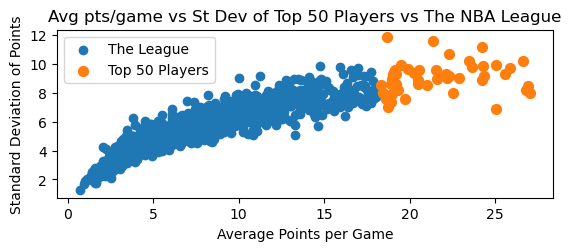

In [40]:
#Scatterplot: Top 50 and rest of league for points
plt.subplot(2, 1, 1)
plt.scatter(combined_pts_avg,combined_pts_std, label="The League")
plt.scatter(top_performers_pts_avg, top_performers_pts_std, label="Top 50 Players", s=50)
plt.legend()
plt.title("Avg pts/game vs St Dev of Top 50 Players vs The NBA League")
plt.xlabel("Average Points per Game")
plt.ylabel("Standard Deviation of Points")
plt.show()

The r-value is: 0.8088942948840633


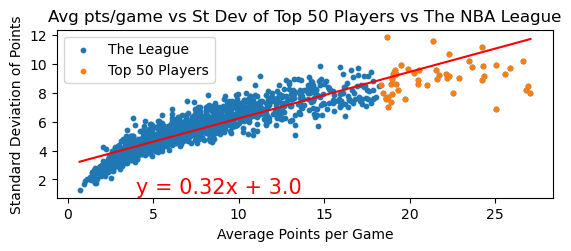

In [41]:
#Scatterplot and Linear Regression: 
plt.subplot(2, 1, 1)
plt.scatter(combined_pts_avg,combined_pts_std, label="The League", s=10)
plt.scatter(top_performers_pts_avg, top_performers_pts_std, label="Top 50 Players", s=10)
plt.legend()
plt.title("Avg pts/game vs St Dev of Top 50 Players vs The NBA League")
plt.xlabel("Average Points per Game")
plt.ylabel("Standard Deviation of Points")

x_values = combined_pts_avg
y_values = combined_pts_std

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (4,1), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")

plt
#Save File and Display
plt.savefig("Resources/Points_Scatter_LinRegress.png")
plt.show()

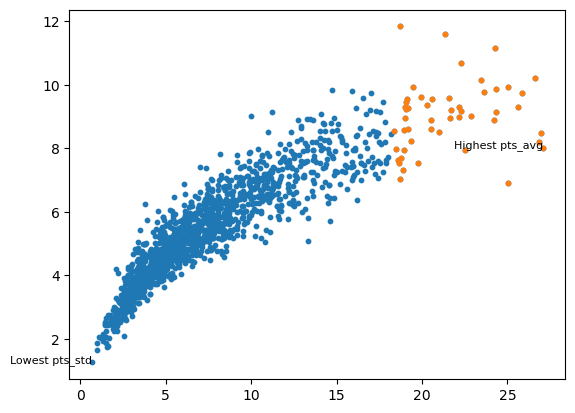

In [45]:
# Labeling highest points and lowest standard deviation

# Find the index of the highest pts_avg and lowest pts_std
highest_pts_avg_index = np.argmax(combined_pts_avg)
lowest_pts_std_index = np.argmin(combined_pts_std)

# Create the scatter plot
plt.scatter(combined_pts_avg, combined_pts_std, label="The League", s=10)
plt.scatter(top_performers_pts_avg, top_performers_pts_std, label="Top 50 Players", s=10)

# Label the highest pts_avg and lowest pts_std data points
plt.text(combined_pts_avg[highest_pts_avg_index], combined_pts_std[highest_pts_avg_index],
         'Highest pts_avg', fontsize=8, ha='right')
plt.text(combined_pts_avg[lowest_pts_std_index], combined_pts_std[lowest_pts_std_index],
         'Lowest pts_std', fontsize=8, ha='right')

# Add other plot details, legends, title, labels, regression line, etc.

# Show the plot
plt.show()


### Analysis: Assists
Compared to the rest of the league, the top 50 NBA players in the category of points have a higher overall average points per game. Likewise, they also have a larger average standard deviation compared to the rest of the league, with an average standard deviation of 9.0 assists compared to 5.7 std for the league as a whole. 

However, when looking at a linear regression for the league as a whole, the top 50 NBA players for points actually fall below the line, indicating that if the rest of the league were putting up the strong pts/game numbers that the top 50 performer are, their standard deviation -- or inconsistency --  would be even higher. 

Therefore, it appears that the top 50 NBA players are actually more consistent than the rest of the league based on expected levels of consistency.